In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import mglearn
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
import numpy as np
import pylab



# Load your CSV data into a DataFrame
df = pd.read_csv('../data/raw_data.csv')

In [3]:
# Assuming loan_df is your DataFrame and 'LoanAmount' is the column to be imputed
loan_df = df[['LoanAmount']]  # Selecting 'LoanAmount' column as a DataFrame

# Impute missing values using the mean strategy
imp_num = SimpleImputer(strategy='mean')
loan_df_imputed = pd.DataFrame(
    imp_num.fit_transform(loan_df),  # Impute missing values
    columns=loan_df.columns  # Keep the original column name
)

# Assign the imputed values back to the original DataFrame
df['LoanAmount'] = loan_df_imputed['LoanAmount']


# check missing values in %age
missing_values = (
    df.isnull().sum()/len(df)*100
).astype(int)

print(f'Column\t\t\t% missing')
print(f'{"-"}'*35)
missing_values



Column			% missing
-----------------------------------


Loan_ID              0
Gender               2
Married              0
Dependents           2
Education            0
Self_Employed        5
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     2
Credit_History       8
Property_Area        0
Loan_Status          0
dtype: int32

In [4]:
# Assuming loan_df is your DataFrame and 'LoanAmount' is the column to be imputed
loan_term_df = df[['Loan_Amount_Term']]  # Selecting 'LoanAmount' column as a DataFrame

# Impute missing values using the mean strategy
imp_num = SimpleImputer(strategy='mean')
loan_term_df_imputed = pd.DataFrame(
    imp_num.fit_transform(loan_term_df),  # Impute missing values
    columns=loan_term_df.columns  # Keep the original column name
)

# Assign the imputed values back to the original DataFrame
df['Loan_Amount_Term'] = loan_term_df_imputed['Loan_Amount_Term']


# check missing values in %age
missing_values = (
    df.isnull().sum()/len(df)*100
).astype(int)

print(f'Column\t\t\t% missing')
print(f'{"-"}'*35)
missing_values



Column			% missing
-----------------------------------


Loan_ID              0
Gender               2
Married              0
Dependents           2
Education            0
Self_Employed        5
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       8
Property_Area        0
Loan_Status          0
dtype: int32

In [5]:
# Assuming loan_df is your DataFrame and 'LoanAmount' is the column to be imputed
Credit_History_df = df[['Credit_History']]  # Selecting 'LoanAmount' column as a DataFrame

# Impute missing values using the mean strategy
imp_num = SimpleImputer(strategy='mean')
Credit_History_df_imputed = pd.DataFrame(
    imp_num.fit_transform(Credit_History_df),  # Impute missing values
    columns=Credit_History_df.columns  # Keep the original column name
)

# Assign the imputed values back to the original DataFrame
df['Credit_History'] = Credit_History_df_imputed['Credit_History']


# check missing values in %age
missing_values = (
    df.isnull().sum()/len(df)*100
).astype(int)

print(f'Column\t\t\t% missing')
print(f'{"-"}'*35)
missing_values



Column			% missing
-----------------------------------


Loan_ID              0
Gender               2
Married              0
Dependents           2
Education            0
Self_Employed        5
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int32

In [6]:
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df.fillna({'Married':0}, inplace=True)
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})
df.fillna({'Self_Employed':0}, inplace=True)
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            614 non-null    float64
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(6), int64(2), object(5)
memory usage: 62.5+ KB


In [7]:
Education_split = pd.get_dummies(
    df['Education'], 
    columns=['Education'], 
    dtype=int) # specify data type else it will return Boolean type
Education_split

,Graduate,Not Graduate
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
609,1,0
610,1,0
611,1,0
612,1,0


In [8]:
Property_Area_split = pd.get_dummies(
    df['Property_Area'], 
    columns=['Property_Area'], 
    dtype=int) # specify data type else it will return Boolean type
Property_Area_split

,Rural,Semiurban,Urban
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
609,1,0,0
610,1,0,0
611,0,0,1
612,0,0,1


In [9]:
Dependents_split = pd.get_dummies(
    df['Dependents'], 
    columns=['Dependents'], 
    dtype=int) # specify data type else it will return Boolean type
Dependents_split

,0,1,2,3+
0,1,0,0,0
1,0,1,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
609,1,0,0,0
610,0,0,0,1
611,0,1,0,0
612,0,0,1,0


In [10]:
gender_split = pd.get_dummies(
    df['Gender'], 
    columns=['Gender'], 
    dtype=int) # specify data type else it will return Boolean type
gender_split

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
609,1,0
610,0,1
611,0,1
612,0,1


In [11]:
df2=df.drop(['Gender','Property_Area','Education','Dependents'],axis=1)
df2 = pd.concat([df2, gender_split,Property_Area_split,Education_split,Dependents_split], axis=1)
df2

,Loan_ID,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Female,Male,Rural,Semiurban,Urban,Graduate,Not Graduate,0,1,2,3+
0,LP001002,0.0,0.0,5849,0.0,146.412162,360.0,1.0,1,0,1,0,0,1,1,0,1,0,0,0
1,LP001003,1.0,0.0,4583,1508.0,128.000000,360.0,1.0,0,0,1,1,0,0,1,0,0,1,0,0
2,LP001005,1.0,1.0,3000,0.0,66.000000,360.0,1.0,1,0,1,0,0,1,1,0,1,0,0,0
3,LP001006,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,1,0,1,0,0,1,0,1,1,0,0,0
4,LP001008,0.0,0.0,6000,0.0,141.000000,360.0,1.0,1,0,1,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,2900,0.0,71.000000,360.0,1.0,1,1,0,1,0,0,1,0,1,0,0,0
610,LP002979,1.0,0.0,4106,0.0,40.000000,180.0,1.0,1,0,1,1,0,0,1,0,0,0,0,1
611,LP002983,1.0,0.0,8072,240.0,253.000000,360.0,1.0,1,0,1,0,0,1,1,0,0,1,0,0
612,LP002984,1.0,0.0,7583,0.0,187.000000,360.0,1.0,1,0,1,0,0,1,1,0,0,0,1,0


In [17]:
df2.describe([x*0.1 for x in range (10)])

,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Female,Male,Rural,Semiurban,Urban,Graduate,Not Graduate,0,1,2,3+
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.648208,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.842199,0.687296,0.182410,0.796417,0.291531,0.379479,0.328990,0.781759,0.218241,0.561889,0.166124,0.164495,0.083062
std,0.477919,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.463973,0.386497,0.402991,0.454838,0.485653,0.470229,0.413389,0.413389,0.496559,0.372495,0.371027,0.276201
min,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0%,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,2216.100000,0.000000,72.300000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20%,0.000000,0.000000,2605.400000,0.000000,96.000000,360.000000,0.842199,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
30%,0.000000,0.000000,3050.400000,0.000000,109.900000,360.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
40%,1.000000,0.000000,3406.800000,0.000000,119.200000,360.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000


# Outliers

<Axes: xlabel='ApplicantIncome'>

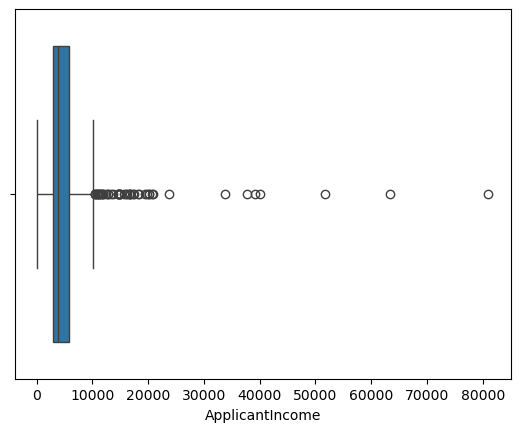

In [21]:
import seaborn as sns
sns.boxplot(x=df2['ApplicantIncome'])

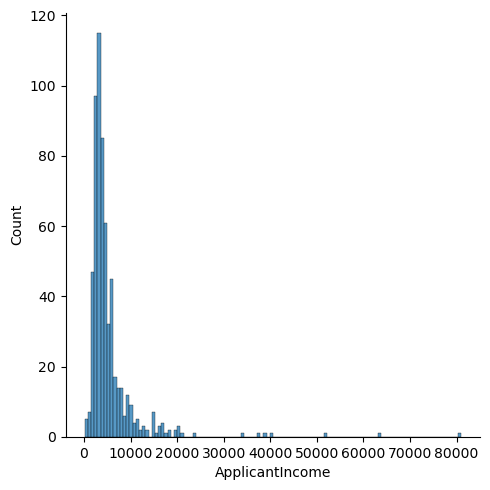

In [25]:
sns.displot(data=df2['ApplicantIncome'])

<Axes: xlabel='ApplicantIncome'>

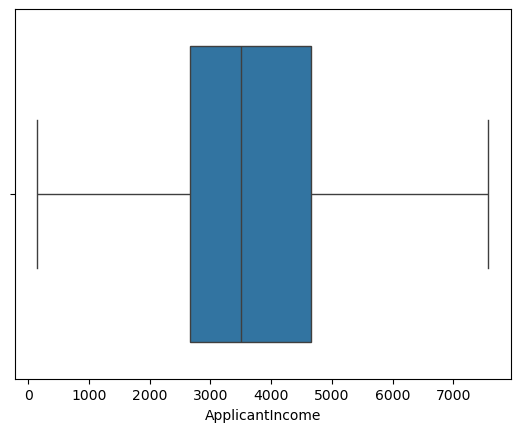

In [33]:
df3= df2[df2['ApplicantIncome']<df2['ApplicantIncome'].quantile(0.85)]
sns.boxplot(x=df3['ApplicantIncome'])

In [12]:

# Assuming your target variable is 'Loan_Status' and features are all other columns
X = df2.drop(['Loan_Status','Loan_ID'], axis=1)
y = df2['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X

,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Female,Male,Rural,Semiurban,Urban,Graduate,Not Graduate,0,1,2,3+
0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,0,1,0,0,1,1,0,1,0,0,0
1,1.0,0.0,4583,1508.0,128.000000,360.0,1.0,0,1,1,0,0,1,0,0,1,0,0
2,1.0,1.0,3000,0.0,66.000000,360.0,1.0,0,1,0,0,1,1,0,1,0,0,0
3,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,0,1,0,0,1,0,1,1,0,0,0
4,0.0,0.0,6000,0.0,141.000000,360.0,1.0,0,1,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,2900,0.0,71.000000,360.0,1.0,1,0,1,0,0,1,0,1,0,0,0
610,1.0,0.0,4106,0.0,40.000000,180.0,1.0,0,1,1,0,0,1,0,0,0,0,1
611,1.0,0.0,8072,240.0,253.000000,360.0,1.0,0,1,0,0,1,1,0,0,1,0,0
612,1.0,0.0,7583,0.0,187.000000,360.0,1.0,0,1,0,0,1,1,0,0,0,1,0


In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            614 non-null    float64
 1   Self_Employed      614 non-null    float64
 2   ApplicantIncome    614 non-null    int64  
 3   CoapplicantIncome  614 non-null    float64
 4   LoanAmount         614 non-null    float64
 5   Loan_Amount_Term   614 non-null    float64
 6   Credit_History     614 non-null    float64
 7   Female             614 non-null    int32  
 8   Male               614 non-null    int32  
 9   Rural              614 non-null    int32  
 10  Semiurban          614 non-null    int32  
 11  Urban              614 non-null    int32  
 12  Graduate           614 non-null    int32  
 13  Not Graduate       614 non-null    int32  
 14  0                  614 non-null    int32  
 15  1                  614 non-null    int32  
 16  2                  614 non

In [38]:
from sklearn.ensemble import IsolationForest
If = IsolationForest(random_state=42)
If.fit(X)
y_pred = If.predict(X)
num_outliers = np.sum(y_pred == -1)
num_inliers = np.sum(y_pred == 1)

print("Number of Outliers:", num_outliers)
print("Number of Inliers:", num_inliers)

Number of Outliers: 215
Number of Inliers: 399


In [40]:
outlier_mask = y_pred == -1
X_filtered = X[~outlier_mask] 
X_filtered

,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Female,Male,Rural,Semiurban,Urban,Graduate,Not Graduate,0,1,2,3+
0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,0,1,0,0,1,1,0,1,0,0,0
1,1.0,0.0,4583,1508.0,128.000000,360.0,1.0,0,1,1,0,0,1,0,0,1,0,0
2,1.0,1.0,3000,0.0,66.000000,360.0,1.0,0,1,0,0,1,1,0,1,0,0,0
3,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,0,1,0,0,1,0,1,1,0,0,0
4,0.0,0.0,6000,0.0,141.000000,360.0,1.0,0,1,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,1.0,0.0,3987,1411.0,157.000000,360.0,1.0,0,1,1,0,0,0,1,0,0,1,0
608,1.0,0.0,3232,1950.0,108.000000,360.0,1.0,0,1,1,0,0,1,0,1,0,0,0
609,0.0,0.0,2900,0.0,71.000000,360.0,1.0,1,0,1,0,0,1,0,1,0,0,0
611,1.0,0.0,8072,240.0,253.000000,360.0,1.0,0,1,0,0,1,1,0,0,1,0,0


In [14]:
ridge10 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))


Training set score: 0.34
Test set score: 0.25


In [15]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.34
Test set score: 0.25


In [16]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))


NameError: name 'Lasso' is not defined

In [ ]:
# Assuming your target variable is 'Loan_Status' and features are all other columns
X = df2.drop(['Loan_Status','Loan_ID'], axis=1)
y = df2['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Calculate baseline model accuracy
acc_baseline = y_train.value_counts(normalize=True).max()

# Print the benchmark
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.7


In [ ]:
# Model pipeline
from sklearn.pipeline import make_pipeline

# Data Scaling
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler

# Three models selected
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Build model
model_lr = make_pipeline(
    OneHotEncoder(feature_name_combiner='concat',handle_unknown='ignore'),
    LogisticRegression(max_iter=2500)
)
# Fit model to training data
model_lr.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('logisticregression', LogisticRegression(max_iter=2500))])

In [ ]:
lr_train_acc = model_lr.score(X_train, y_train)
lr_val_acc = model_lr.score(X_test, y_test)

print("Logistic Regression, Training Accuracy Score:", lr_train_acc)
print("Logistic Regression, Validation Accuracy Score:", lr_val_acc)

Logistic Regression, Training Accuracy Score: 0.9021739130434783
Logistic Regression, Validation Accuracy Score: 0.7727272727272727


In [ ]:
model_lr.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
      dtype=int64)

NameError: name 'df2' is not defined